## 6.4: Supervised Machine Learning: Regression

### This script contains the following:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis

### 1. Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs I create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Path
path = r'C:\Users\Family Computer\Documents\Data Analytics\Real Estate Price Prediction'

In [4]:
#Import RDC_inventory_by_month_updated.pkl (from 6.2)
df_inventory_by_month_updated=pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'RDC_inventory_by_month_updated.pkl'))

### 2. Data cleaning

In [5]:
df_inventory_by_month_updated.head()

,month_date_yyyymm,zipcode,city_state,median_listing_price,active_listing_count,median_days_on_market,new_listing_count,price_increased_count,price_reduced_count,pending_listing_count,median_listing_price_per_square_foot,median_square_feet,average_listing_price,total_listing_count,days_on_market_category
0,202401,59259,"richey, mt",74000.0,2.0,59.0,0.0,0.0,0.0,19.93114,96.0,824.0,74000.0,2.0,high_days_on_market
1,202401,97369,"otter rock, or",28250.0,8.0,53.0,2.0,0.0,0.0,19.93114,29.0,947.0,130056.0,8.0,high_days_on_market
2,202401,4922,"burnham, me",187000.0,4.0,81.0,0.0,0.0,0.0,3.00000,178.0,907.0,207661.0,7.0,high_days_on_market
3,202401,49705,"afton, mi",84875.0,1.0,76.0,0.0,0.0,2.0,1.00000,91.0,903.0,84875.0,1.0,high_days_on_market
4,202401,11965,"shelter island heights, ny",3097500.0,4.0,113.0,0.0,0.0,0.0,19.93114,1666.0,1798.0,2830000.0,4.0,high_days_on_market


In [6]:
df_inventory_by_month_updated.shape

(2577829, 15)

In [7]:
df_inventory_by_month_updated.columns

Index(['month_date_yyyymm', 'zipcode', 'city_state', 'median_listing_price',
       'active_listing_count', 'median_days_on_market', 'new_listing_count',
       'price_increased_count', 'price_reduced_count', 'pending_listing_count',
       'median_listing_price_per_square_foot', 'median_square_feet',
       'average_listing_price', 'total_listing_count',
       'days_on_market_category'],
      dtype='object')

##### Missing values

In [8]:
# Check for missing values

df_inventory_by_month_updated.isnull().sum()

month_date_yyyymm                       0
zipcode                                 0
city_state                              0
median_listing_price                    0
active_listing_count                    0
median_days_on_market                   0
new_listing_count                       0
price_increased_count                   0
price_reduced_count                     0
pending_listing_count                   0
median_listing_price_per_square_foot    0
median_square_feet                      0
average_listing_price                   0
total_listing_count                     0
days_on_market_category                 0
dtype: int64

##### No missing values

In [9]:
dups = df_inventory_by_month_updated.duplicated()

In [10]:
dups.shape

(2577829,)

##### No dups

##### Extreme values checks

##### The coefficient for total_listing_count to price_reduced_count was 0.90, which indicates a very strong positive correlation between these variables and shows that a large percentage of the total_listing_count incur a price reduction. I want to test this relationship further. 

C:\Users\Family Computer\AppData\Local\Temp\ipykernel_22896\2588274794.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_inventory_by_month_updated['total_listing_count'], bins=10)


<Axes: xlabel='total_listing_count', ylabel='Density'>

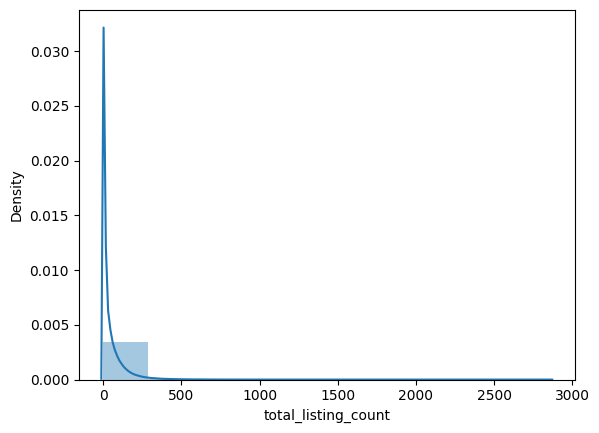

In [11]:
# Shows extreme values in median_listing_price column
sns.distplot(df_inventory_by_month_updated['total_listing_count'], bins=10)

In [12]:
# Check the mean

df_inventory_by_month_updated['total_listing_count'].mean()

47.348889727008284

In [13]:
# Check the median

df_inventory_by_month_updated['total_listing_count'].median()

16.0

In [14]:
# Check the max

df_inventory_by_month_updated['total_listing_count'].max()

2860.0

In [15]:
# Check the min

df_inventory_by_month_updated['total_listing_count'].min()

0.0

In [16]:
# Select only entries with a non-zero rating

df_inventory_by_month_updated = df_inventory_by_month_updated[df_inventory_by_month_updated['total_listing_count'] >= 1]

C:\Users\Family Computer\AppData\Local\Temp\ipykernel_22896\2588274794.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_inventory_by_month_updated['total_listing_count'], bins=10)


<Axes: xlabel='total_listing_count', ylabel='Density'>

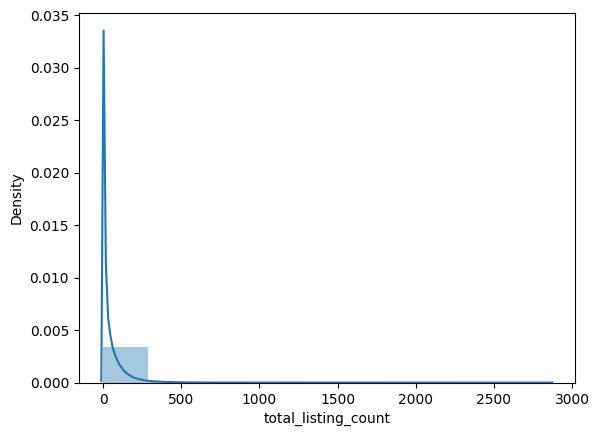

In [17]:
# Shows extreme values in median_listing_price column
sns.distplot(df_inventory_by_month_updated['total_listing_count'], bins=10)

In [18]:
df_inventory_by_month_updated.head()

,month_date_yyyymm,zipcode,city_state,median_listing_price,active_listing_count,median_days_on_market,new_listing_count,price_increased_count,price_reduced_count,pending_listing_count,median_listing_price_per_square_foot,median_square_feet,average_listing_price,total_listing_count,days_on_market_category
0,202401,59259,"richey, mt",74000.0,2.0,59.0,0.0,0.0,0.0,19.93114,96.0,824.0,74000.0,2.0,high_days_on_market
1,202401,97369,"otter rock, or",28250.0,8.0,53.0,2.0,0.0,0.0,19.93114,29.0,947.0,130056.0,8.0,high_days_on_market
2,202401,4922,"burnham, me",187000.0,4.0,81.0,0.0,0.0,0.0,3.00000,178.0,907.0,207661.0,7.0,high_days_on_market
3,202401,49705,"afton, mi",84875.0,1.0,76.0,0.0,0.0,2.0,1.00000,91.0,903.0,84875.0,1.0,high_days_on_market
4,202401,11965,"shelter island heights, ny",3097500.0,4.0,113.0,0.0,0.0,0.0,19.93114,1666.0,1798.0,2830000.0,4.0,high_days_on_market


In [19]:
df_inventory_by_month_updated.shape

(2567376, 15)

### 3. Data prep for regression analysis 

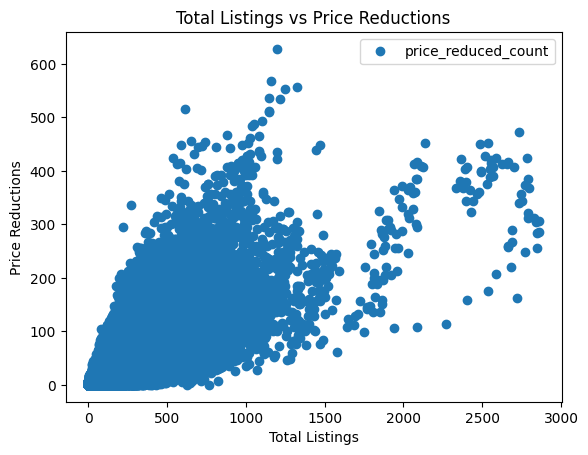

In [22]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df_inventory_by_month_updated.plot(x = 'total_listing_count', y='price_reduced_count',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Total Listings vs Price Reductions')  
plt.xlabel('Total Listings')  
plt.ylabel('Price Reductions')  
plt.show()

##### Hypothesis: The greater the number of total listings, the greater the number of price reductions. 

In [24]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_inventory_by_month_updated['total_listing_count'].values.reshape(-1,1)
y = df_inventory_by_month_updated['price_reduced_count'].values.reshape(-1,1)

In [25]:
X

array([[ 2.        ],
       [ 8.        ],
       [ 7.        ],
       ...,
       [65.        ],
       [ 3.        ],
       [47.34888973]])

In [26]:
y

array([[ 0.        ],
       [ 0.        ],
       [ 0.        ],
       ...,
       [24.        ],
       [ 0.        ],
       [ 8.51186558]])

In [27]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 4. Regression analysis

In [28]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [29]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [30]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

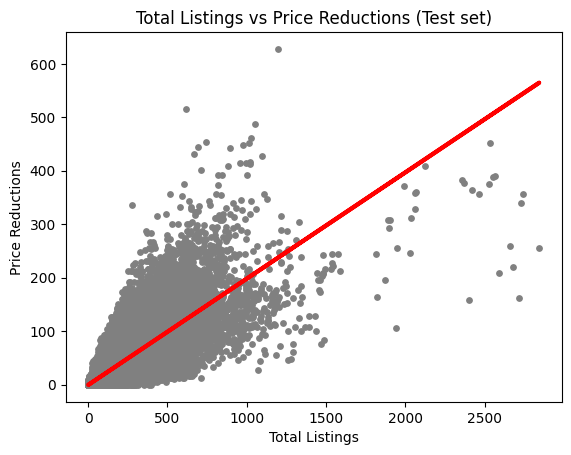

In [31]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Total Listings vs Price Reductions (Test set)')
plot_test.xlabel('Total Listings')
plot_test.ylabel('Price Reductions')
plot_test.show()

##### The line fits the data pretty well, but there are still a lot of data points that are far away from the line. The data points that are far from the line still appear to have a positive correlation though. 

In [32]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [33]:
# Print the model summary statistics.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.19886792]]
Mean squared error:  93.63430051565194
R2 score:  0.7287774567447936


In [34]:
y_predicted

array([[ 0.68825378],
       [ 0.8871217 ],
       [26.93881967],
       ...,
       [-0.50495376],
       [ 4.2678764 ],
       [-0.30608584]])

In [35]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,2.0,0.688254
1,8.0,0.887122
2,28.0,26.938820
3,0.0,-0.306086
4,6.0,8.444103
5,2.0,-0.306086
6,0.0,-0.703822
7,4.0,0.489386
8,0.0,-0.107218
9,0.0,-0.306086


##### When I reviewed the Slope: 0.19886792, the 
Mean squared error:  93.6343005156519 and the 
R2 score:  0.72877745674479 my initial thoughts was that the slope indicated a postive correlation, which matches my scatterplot. The mean squared error appeared to be low as this dataset contains 2567376 data points. The R2 score of .728 also appeared to be pretty good as it is close to 1 which would indicate a good fit. However, once I compared the actual and predicted values of y, the model no longer appears to be performing very well. There are large differences between the actual and predicted values. 36

##### I believe the only data bias that may affect the data would be collection bias as the data set comes from Realtor.com which sydicates with the MLS's accorss the country so any errors in the data would be user input errors - the person who input the data into the MLS - either from inputting inaccurate information on purpose or on accident, assuming information and not verifying the data, or by not updating information in a timely fashion which could skew the numbers. 